# **Derivatives Steps**

### **Chain Rule**:
$\frac{d}{dx}(f(g(x))) = f'(g(x)).g'(x)$

### **Quotient rule**:
$\frac{d}{dx}(\frac{f(x)}{g(x)}) = \frac{f'(x)g(x) - f(x)g'(x)}{|g(x)|^2}$

### **Common derivatives**:
$\frac{d}{dx}(e^x) = e^x$

## **Step-by-step**

L = $(y-y)^2$

Use **chain rule**:\
$\frac{dL}{dw} = 2(y'-y).\frac{d}{dw}(y'-y)$

$y' = σ(z)$ \
$\frac{dσ(z)}{dw} = \frac{dσ(z)}{dz} . \frac{dz}{dw}$

$\frac{dσ(z)}{dz} = \frac{d}{dz}(\frac{1}{1+e^{-z}})$

Because it use sigmoid, we use **quotient rule**:\
$\frac{d}{dz}(\frac{1}{1+e^-z}) = \frac{0.(1+e^{-z}) - 1.(-e^{-z})}{|1+e^{-z}|^2}$\
$= \frac{e^{-z}}{(1+e^{-z})^2}$ \
$= \frac{1}{1+e^{-z}} . \frac{e^{-z}}{1+e^{-z}}$ \
$= σ(z) . (1-σ(z))$ \
$= y' . (1-y')$

$\frac{dz}{dw} = \frac{d}{dw}(xw+b) = x$

Therefore, $\frac{d}{dw}(y'-y) = y'.(1-y').x$

Then: \
$\frac{dL}{dw} = 2(y'-y).y'.(1-y').x$

$\frac{dL}{db} = 2(y'-y).y'.(1-y')$, because\
$\frac{dz}{db} = \frac{d}{db}(xw+b) = 1$

# **Code**

## **Full data is used in the training**

Start epoch 1:
total SSE: 36.8929025614208, Accuracy: 61.0
End epoch 1

Start epoch 2:
total SSE: 3.0839520308491495, Accuracy: 96.0
End epoch 2

Start epoch 3:
total SSE: 2.0048571307540834, Accuracy: 98.0
End epoch 3

Start epoch 4:
total SSE: 1.4273287149474696, Accuracy: 98.0
End epoch 4

Start epoch 5:
total SSE: 1.0512892058989958, Accuracy: 99.0
End epoch 5



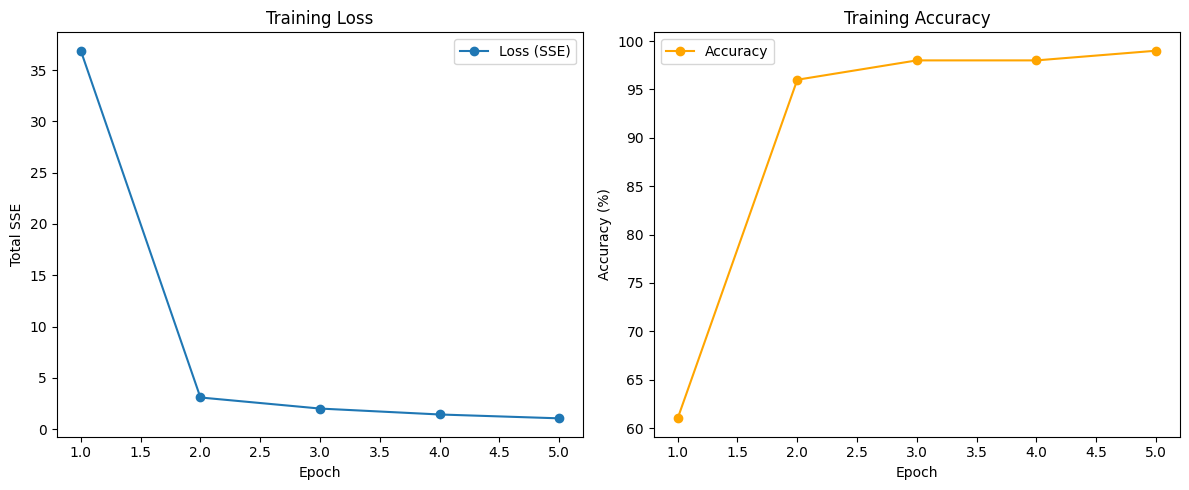

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
iris_biner = pd.read_excel("Copy of PMM-TemplateSLP.xlsx", header=None)
iris_biner.columns = ['x1', 'x2', 'x3', 'x4', 'Target']

# Encode the target
iris_biner["Target"] = iris_biner["Target"].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

X = iris_biner[['x1', 'x2', 'x3', 'x4']].to_numpy()
Y = iris_biner['Target'].to_numpy()

# Initialize weights
w = np.array([0.5, 0.5, 0.5, 0.5])
b = 0.5

def single_layer_perceptron(X = X, Y = Y, Lr = 0.1, w = 0, b = 0, epoch = 5):

    losses = []
    accuracies = []

    for epochs in range(epoch):

        correct_preds = 0
        total_SSE = 0
        print(f"Start epoch {epochs+1}:")

        for i in range(len(X)):

            # Perform Forward
            z = X[i] @ w.T + b

            # Sigmoid
            Y_hat = 1 / (1 + np.exp(-z))

            # Prediction
            Pred = (Y_hat >= 0.5).astype(int)

            # Track accuracy
            if Pred == Y[i]:
                correct_preds += 1

            # Error
            E = Y_hat - Y[i]

            # Sum Squared Error
            SSE = E ** 2
            total_SSE += SSE

            # Perform gradient descent
            dw = X[i] * (2 * (Y_hat - Y[i]) * Y_hat * (1 - Y_hat))
            db = (2 * (Y_hat - Y[i]) * Y_hat * (1 - Y_hat))

            # Update the weights
            w -= Lr * dw
            b -= Lr * db

        # Report statistic
        accuracy = correct_preds / len(X) * 100
        losses.append(total_SSE)
        accuracies.append(accuracy)

        print(f"total SSE: {total_SSE}, Accuracy: {accuracy}")
        print(f"End epoch {epochs+1}\n")

    # Plot Loss and Accuracy
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(range(1, epoch+1), losses, marker='o', label="Loss (SSE)")
    plt.xlabel("Epoch")
    plt.ylabel("Total SSE")
    plt.title("Training Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, epoch+1), accuracies, marker='o', color="orange", label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Training Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

single_layer_perceptron(w = w, b = b)

## **Data is split into training and validation set**

Start epoch 1:
Epoch 1/5 | Train Loss: 35.3357, Train Acc: 51.25% | Val Loss: 3.3844, Val Acc: 55.00%
End epoch 1

Start epoch 2:
Epoch 2/5 | Train Loss: 5.0251, Train Acc: 97.50% | Val Loss: 0.4134, Val Acc: 100.00%
End epoch 2

Start epoch 3:
Epoch 3/5 | Train Loss: 1.4726, Train Acc: 100.00% | Val Loss: 0.1980, Val Acc: 100.00%
End epoch 3

Start epoch 4:
Epoch 4/5 | Train Loss: 0.8877, Train Acc: 100.00% | Val Loss: 0.1312, Val Acc: 100.00%
End epoch 4

Start epoch 5:
Epoch 5/5 | Train Loss: 0.6417, Train Acc: 100.00% | Val Loss: 0.0985, Val Acc: 100.00%
End epoch 5



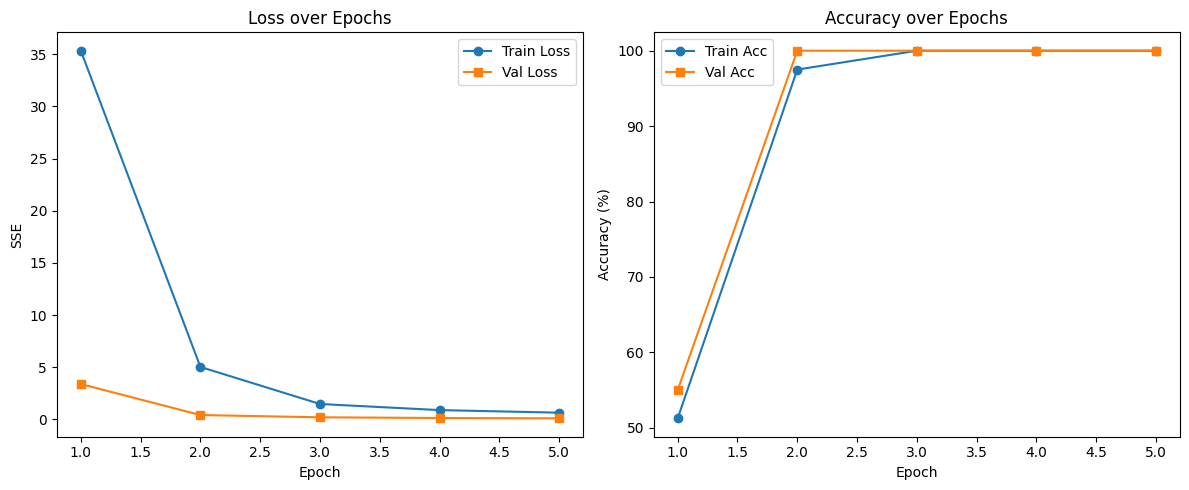

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import the data
iris_biner = pd.read_excel("Copy of PMM-TemplateSLP.xlsx", header=None)
iris_biner.columns = ['x1', 'x2', 'x3', 'x4', 'Target']

# Encode the target
iris_biner["Target"] = iris_biner["Target"].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

X = iris_biner[['x1', 'x2', 'x3', 'x4']].to_numpy()
Y = iris_biner['Target'].to_numpy()

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Initialize weights
w = np.array([0.5, 0.5, 0.5, 0.5])
b = 0.5

def single_layer_perceptron(X_train = X_train, Y_train = Y_train, X_val = X_val, Y_val = Y_val, Lr = 0.1, w = 0, b = 0, epoch = 5):

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    # Training
    for epochs in range(epoch):

        correct_preds = 0
        train_loss = 0
        print(f"Start epoch {epochs+1}:")

        # Train
        for i in range(len(X_train)):

            # Perform Forward
            z = X_train[i] @ w.T + b

            # Sigmoid
            Y_hat = 1 / (1 + np.exp(-z))

            # Prediction
            Pred = (Y_hat >= 0.5).astype(int)

            # Track accuracy
            if Pred == Y_train[i]:
                correct_preds += 1

            # Error
            E = Y_hat - Y_train[i]

            # Sum Squared Error
            train_loss += E ** 2

            # Perform gradient descent
            dw = X_train[i] * (2 * (Y_hat - Y_train[i]) * Y_hat * (1 - Y_hat))
            db = (2 * (Y_hat - Y_train[i]) * Y_hat * (1 - Y_hat))

            # Update the weights
            w -= Lr * dw
            b -= Lr * db

        # Training statistic
        train_accuracy = correct_preds / len(X_train) * 100
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation with the updated weight
        val_preds = []
        val_loss = 0
        for i in range(len(X_val)):
            z = X_val[i] @ w.T + b
            Y_hat = 1 / (1 + np.exp(-z))
            Pred = (Y_hat >= 0.5).astype(int)
            val_preds.append(Pred)

            E = Y_hat - Y_val[i]
            val_loss += E**2

        # Validation Statistic
        val_acc = (np.array(val_preds) == Y_val).mean() * 100
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Print epoch report
        print(f"Epoch {epochs+1}/{epoch} | Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"End epoch {epochs+1}\n")

    # --- Plot ---
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(range(1, epoch+1), train_losses, marker='o', label="Train Loss")
    plt.plot(range(1, epoch+1), val_losses, marker='s', label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("SSE")
    plt.title("Loss over Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, epoch+1), train_accuracies, marker='o', label="Train Acc")
    plt.plot(range(1, epoch+1), val_accuracies, marker='s', label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy over Epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()

single_layer_perceptron(w = w, b = b)